In [13]:
from catboost import CatBoostRegressor, Pool
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import metrics

pd.options.display.max_columns = 200

In [24]:
def read_file(path):
    df = pd.read_excel(path)
    df.columns = df.iloc[4]
    df = df.iloc[5:][df.columns[:-1]]

    columns = df.columns.tolist()

    columns[3] = 'продажи'
    columns[16] = 'заболеваемость'
    columns[33] = 'ТВ реклама, руб'
    columns[35] = 'интернет реклама, руб'
    columns[51] = 'wordstat'
    
    df.columns = columns

    return df

df = read_file('data/train.xlsx')

display(df)

# df.columns.tolist().index('Статистика заболеваемости')

,год,неделя,Начало нед,продажи,"Продажи, рубли","Продажи, упаковки","Продажи, рубли","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки",Дистрибуция Мирамистин,Выписки,заболеваемость,Индекс цены,Развитие Дженериков \n(средняя дистрибуция),Развитие Дженериков \n(кол-во брендов),"(1)\nТВ, trp\n(Ж 30-60 ВС)","(1)\nТВ, рубли","(1)\nТВ, охват 5+\n(Ж 30-60 ВС)","(2)\nТВ, trp\n(Ж 30-60 ВС)","(2)\nТВ, рубли","(2)\nТВ, охват 5+\n(Ж 30-60 ВС)","(3)\nТВ, trp\n(Ж 30-60 ВС)","(3)\nТВ, рубли","(3)\nТВ, охват 5+\n(Ж 30-60 ВС)","(4)\nТВ, trp\n(Ж 30-60 ВС)","(4)\nТВ, рубли","(4)\nТВ, охват 5+\n(Ж 30-60 ВС)","(тотал)\nТВ, trp\n(Ж 30-60 ВС)","ТВ реклама, руб","(тотал)\nТВ, охват 5+\n(Ж 30-60 ВС)","интернет реклама, руб","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, количество выходов",wordstat,"ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб",...,"ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, trp\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, охват 5+\n(Ж 30-60 ВС)","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","ТВ, рубли","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","Диджитал, руб","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","ТВ спонсорство, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","OOH, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли","Радио, рубли",Итого,Итого,Итого,Итого,Итого,Итого,Итого,Итого,Итого,Итого,Итого,Итого,Итого
5,2019,1,2018-12-31 00:00:00,41535567.339,0,114621.15,41535567.339,0,0,0,0,0,0,0,0.92107,99698.595433,508956,1.54132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,1057612.5,0,0,0,0,0,0,0,0,0

In [5]:
url = 'https://docs.google.com/spreadsheets/d/1EpOO5QwqiUsUQdRPGptvEQuoBYD1EJJA/edit?usp=sharing&ouid=106648689271918456613&rtpof=true&sd=true'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url, header=[0,1])

df.columns = [f'{i[0]}_{i[1]}'.replace('\n', '') for i in df.columns]

In [6]:
df

,Период_год,Период_неделя,Период_Начало нед,KPI данные понедельно АлфаРМ_target,"KPI данные понедельно АлфаРМ_Продажи, упаковки",KPIданные помесячно АлфаРМ_kpi_продажи_руб,"KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки",...,"Медиа (Конкурент 12)_ТВ Рег, рубли",Медиа (Конкурент 12)_Итого,"Медиа (Конкурент 13)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, рубли","Медиа (Конкурент 13)_Диджитал, руб","Медиа (Конкурент 13)_ТВ спонсорство, рубли","Медиа (Конкурент 13)_OOH, рубли","Медиа (Конкурент 13)_Радио, рубли",Медиа (Конкурент 13)_Итого
0,2019.0,1,2018-12-31,4.153557e+07,114621.15,0.0,0.0,0.0,0.0,0.0,...,7.155664e+06,11834254.13,207.903106,15.3615,9085528.010323,0.0,0.0,0.0,0.0,9085528.01
1,NaN,2,2019-01-07,5.122229e+07,141523.20,0.0,0.0,0.0,0.0,0.0,...,8.348274e+06,13996532.16,317.467542,25.5255,10599782.67871,0.0,0.0,0.0,0.0,10599782.68
2,NaN,3,2019-01-14,5.712735e+07,157926.30,0.0,0.0,0.0,0.0,0.0,...,8.348274e+06,11466294.66,192.816682,13.9125,10599782.67871,0.0,0.0,0.0,0.0,10599782.68
3,NaN,4,2019-01-21,6.304099e+07,173746.65,0.0,0.0,0.0,0.0,0.0,...,8.348274e+06,10764632.16,138.371621,8.0535,10599782.67871,0.0,0.0,0.0,0.0,10599782.68
4,NaN,5,2019-01-28,6.733689e+07,185551.80,0.0,0.0,0.0,0.0,0.0,...,8.477038e+06,10984967.91,286.984113,24.2235,12893092.405548,0.0,0.0,0.0,0.0,12893092.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,NaN,49,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,50,2024-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,NaN,51,2024-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,NaN,52,2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
pd.options.display.max_columns = 200

# df = pd.read_excel('data/train.xlsx')

url = 'https://docs.google.com/spreadsheets/d/1EpOO5QwqiUsUQdRPGptvEQuoBYD1EJJA/edit?usp=sharing&ouid=106648689271918456613&rtpof=true&sd=true'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_excel(url, header=[0,1])

df.columns = [f'{i[0]}_{i[1]}'.replace('\n', '') for i in df.columns]



columns = df.columns.tolist()


columns[3] = 'target'

columns[5] = 'kpi_продажи_рубли'

for i in range(6, 12):
    columns[i] = f'Раствор_{i}'

df.columns = columns
df.reset_index(drop=True, inplace=True)

df

,Период_год,Период_неделя,Период_Начало нед,target,"KPI данные понедельно АлфаРМ_Продажи, упаковки",kpi_продажи_рубли,Раствор_6,Раствор_7,Раствор_8,Раствор_9,Раствор_10,Раствор_11,Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,статистика заболеваемости_Статистика заболеваемости,индекс цены_Индекс цены,развитие дженериков_Развитие Дженериков (средняя дистрибуция),развитие дженериков_Развитие Дженериков (кол-во брендов),"Медиа ТВ (Моделироуемый бренд)_(1)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(1)ТВ, рубли","Медиа ТВ (Моделироуемый бренд)_(1)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(2)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(2)ТВ, рубли","Медиа ТВ (Моделироуемый бренд)_(2)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(3)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(3)ТВ, рубли","Медиа ТВ (Моделироуемый бренд)_(3)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(4)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделироуемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделироуемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделироуемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,"Медиа (Конкурент 1)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 1)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 1)_ТВ, рубли","Медиа (Конкурент 1)_Диджитал, руб","Медиа (Конкурент 1)_ТВ спонсорство, рубли","Медиа (Конкурент 1)_OOH, рубли","Медиа (Конкурент 1)_Радио, рубли",Медиа (Конкурент 1)_Итого,"Медиа (Конкурент 2)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 2)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 2)_ТВ, рубли","Медиа (Конкурент 2)_Диджитал, руб","Медиа (Конкурент 2)_ТВ спонсорство, рубли","Медиа (Конкурент 2)_OOH, рубли","Медиа (Конкурент 2)_Радио, рубли",Медиа (Конкурент 2)_Итого,"Медиа (Конкурент 3)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 3)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 3)_ТВ, рубли","Медиа (Конкурент 3)_Диджитал, руб","Медиа (Конкурент 3)_ТВ спонсорство, рубли","Медиа (Конкурент 3)_OOH, рубли","Медиа (Конкурент 3)_Радио, рубли","Медиа (Конкурент 3)_ТВ Рег, рубли",Медиа (Конкурент 3)_Итого,"Медиа (Конкурент 4)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 4)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 4)_ТВ, рубли","Медиа (Конкурент 4)_Диджитал, руб","Медиа (Конкурент 4)_ТВ спонсорство, рубли","Медиа (Конкурент 4)_OOH, рубли","Медиа (Конкурент 4)_Радио, рубли",Медиа (Конкурент 4)_Итого,"Медиа (Конкурент 5)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 5)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 5)_ТВ, рубли","Медиа (Конкурент 5)_Диджитал, руб","Медиа (Конкурент 5)_ТВ спонсорство, рубли","Медиа (Конкурент 5)_OOH, рубли","Медиа (Конкурент 5)_Радио, рубли","Медиа (Конкурент 5)_ТВ Рег, рубли",Медиа (Конкурент 5)_Итого,"Медиа (Конкурент 6)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 6)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 6)_ТВ, рубли","Медиа (Конкурент 6)_Диджитал, руб","Медиа (Конкурент 6)_ТВ спонсорство, рубли","Медиа (Конкурент 6)_OOH, рубли","Медиа (Конкурент 6)_Радио, рубли","Медиа (Конкурент 6)_ТВ Рег, рубли",Медиа (Конкурент 6)_Итого,"Медиа (Конкурент 7)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 7)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 7)_ТВ, рубли","Медиа (Конкурент 7)_Диджитал, руб","Медиа (Конкурент 7)_ТВ спонсорство, рубли","Медиа (Конкурент 7)_OOH, рубли","Медиа (Конкурент 7)_Радио, рубли","Медиа (Конкурент 7)_ТВ Рег, рубли",Медиа (Конкурент 7)_Итого,"Медиа (Конкурент 8)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 8)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 8)_ТВ, рубли","Медиа (Конкурент 8)_Диджитал, руб","Медиа (Конкурент 8)_ТВ спонсорство, рубли","Медиа (Конкурент 8)_OOH, рубли","Медиа (Конкурент 8)_Радио, рубли",Медиа (Конкурент 8)_Итого,"Медиа (Конкурент 9)

In [5]:
df.to_csv('data/train_new.csv', index=False)

<Axes: >

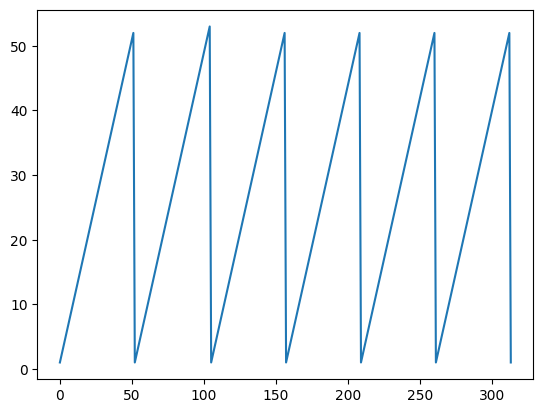

In [3]:
df['Период_неделя'].plot()

In [4]:
df['Период_неделя'].max()

53

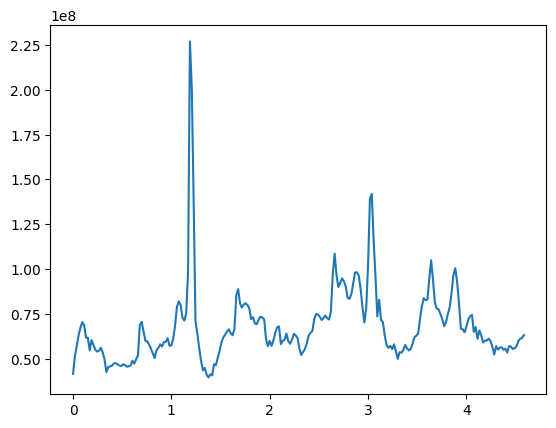

In [5]:
plt.plot(df.index / 53, df['target'])

In [6]:
import pandas as pd

def create_features(df):
    for i in range(1, 8):
        df[f'feature_target_{i}_weeks_ago'] = df['target'].shift(i)
    
    for i in [3, 7, 15]:
        df[f'feature_mean_last_{i}_weeks'] = df['target'].rolling(window=i).mean()

    # df['ratio_yesterday_to_day_before_yesterday'] = df['value_yesterday'] / df['value_day_before_yesterday']

    bad_cols = [col for col in df.columns if 'feature' not in col and col != 'target']
    df.drop(bad_cols, axis=1, inplace=True)
    
    return df

df = create_features(df)
df = df.dropna().reset_index(drop=True)

In [7]:
test_size = 0.4

train_data, valid_data = df[:int(len(df) * (1-test_size))], df[int(len(df) * (1-test_size)):]

X_train, y_train = train_data.drop('target', axis=1), train_data['target']
X_valid, y_valid = valid_data.drop('target', axis=1), valid_data['target']

In [8]:
model = CatBoostRegressor(
    depth=3,
    iterations=1000,
    loss_function='MAE',
    eval_metric='R2',

    # learning_rate=0.0158,
    # l2_leaf_reg=3.1954,
    # random_strength=1.91,
    # border_count=138,
    # grow_policy='Depthwise',

    random_state=42,
    thread_count=4
)

model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=500)

0:	learn: -0.0232969	test: -0.2338224	best: -0.2338224 (0)	total: 55.2ms	remaining: 55.2s
500:	learn: 0.8045775	test: 0.8664845	best: 0.8664845 (500)	total: 123ms	remaining: 122ms
999:	learn: 0.8758066	test: 0.8953125	best: 0.8953125 (999)	total: 201ms	remaining: 0us

bestTest = 0.8953125124
bestIteration = 999



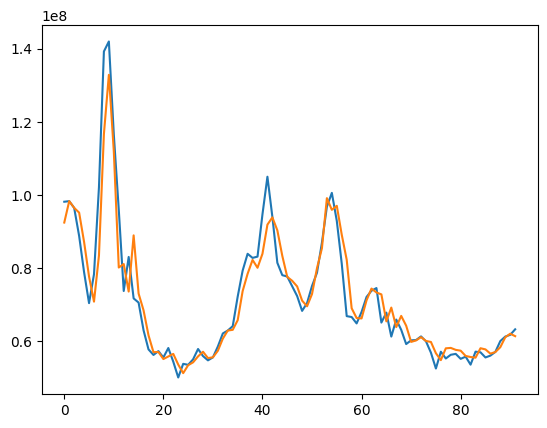

In [9]:
plt.plot(y_valid.tolist())
plt.plot(model.predict(X_valid))

In [27]:
preds = model.predict(X_valid)

print(f'R2: {round(metrics.r2_score(y_valid, preds), 5)}')
print(f'MAPE: {round(metrics.mean_absolute_percentage_error(y_valid, preds), 5)}')

R2: 0.89531
MAPE: 0.0488
